# KI-Campus: Learn2Trust
## Lektion 3: Medizinische Bilddatensätze

### 1. Einführung
In dieser Lektion geht es um die Grundlage von KI-Modellen in der medizinischen Bildverarbeitung, den Bilddatensätzen.

Am Beispiel von verschiedenen medizinischen Bilddaten wird die Vorverarbeitung und Augmentierung von medizinischen Bilddatensätzen vorgestellt.

*Importieren von benötigten Paketen und weiteren Dateien:*

In [1]:
# import packages
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as T
from PIL import Image
from skimage.util import random_noise

import warnings
warnings.filterwarnings("ignore") 

torch.manual_seed(9999);

*Definition Plot-Funktionen:*

In [2]:
# plot images
def plot_images(thorax_img, skin_img, brain_img):
    plt.imshow(thorax_img, cmap='gray')
    plt.title('Thorax')
    plt.show()

    plt.imshow(skin_img)
    plt.title('Skin')
    plt.show()

    plt.imshow(brain_img, cmap='gray')
    plt.title('Brain')
    plt.show()

#plot before and after
def plot_images_before_after(thorax_img_before, skin_img_before, brain_img_before, thorax_img_after, skin_img_after, brain_img_after):
    
    plt.figure(figsize=[15, 15])
    
    plt.subplot(3,2,1)
    plt.imshow(thorax_img_before, cmap='gray')
    plt.title('Thorax Before')
    
    plt.subplot(3,2,2)
    plt.imshow(thorax_img_after, cmap='gray')
    plt.title('Thorax After')
    
    plt.subplot(3,2,3)
    plt.imshow(skin_img_before)
    plt.title('Skin Before')
    
    plt.subplot(3,2,4)
    plt.imshow(skin_img_after)
    plt.title('Skin After')
    
    plt.subplot(3,2,5)
    plt.imshow(brain_img_before, cmap='gray')
    plt.title('Brain Before')
    
    plt.subplot(3,2,6)
    plt.imshow(brain_img_after, cmap='gray')
    plt.title('Brain After')
    plt.show()

### 2. Daten
Die Daten für diese Lektion bestehen aus einer Röntgen Thorax Aufahme, einer Nahaufnahme der Haut und aus einem Gehirn MRT-Scan, um unterschiedliche Bildmodalitäten der klinischen Praxis darzustellen.

*Laden der Bilddaten:*

In [3]:
# load image data
Thorax_img_orig = Image.open('thorax_img.jpeg')
Skin_img_orig = Image.open('skin_img.jpg')
Brain_img_orig = Image.open('brain_img.png')

# print data specs
print(f'shape of data:\nThorax_img: {Thorax_img_orig.size}\nSkin_img: {Skin_img_orig.size}\nBrain_img: {Brain_img_orig.size}')

shape of data:
Thorax_img: (1240, 840)
Skin_img: (6000, 4000)
Brain_img: (256, 256)


*Einfache Vorverarbeitung, um alle Bilder auf die gleiche Ausgangsgröße zuzuschneiden:*

In [4]:
# basic preprocessing
Thorax_img = T.Resize(size=512)(Thorax_img_orig)
Thorax_img = T.CenterCrop(size=[512, 512])(Thorax_img)

Skin_img = T.Resize(size=512)(Skin_img_orig)
Skin_img = T.CenterCrop(size=[512, 512])(Skin_img)

Brain_img = T.Resize(size=512)(Brain_img_orig)
Brain_img = T.CenterCrop(size=[512, 512])(Brain_img)

# print data specs
print(f'shape of data:\nThorax_img: {Thorax_img.size}\nSkin_img: {Skin_img.size}\nBrain_img: {Brain_img.size}')

shape of data:
Thorax_img: (512, 512)
Skin_img: (512, 512)
Brain_img: (512, 512)


*Darstellung der Ausgangsbilder:*

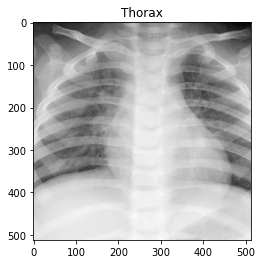

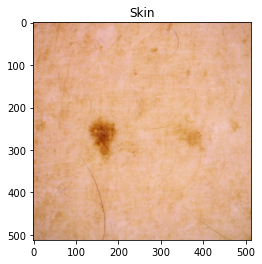

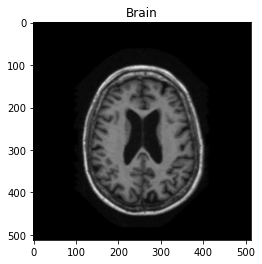

In [5]:
plot_images(Thorax_img, Skin_img, Brain_img)

### 4. Vorverarbeitung
Im Rahmen der Vorverarbeitung werden die Bilder bezüglich ihrer Bildbereiche, Größe, Auflösung und Wertebereich vereinheitlicht.

Häufig eingesetzte Methoden zur Vorverarbeitung sind zum Beispiel die Größenänderung (engl. *Resizing*), das Zuschneiden (engl. *Cropping*) und das Auffüllen (engl. *Padding*).

*Definition von drei Vorverarbeitungsmethoden:*

In [6]:
preprocessing = []  # preprocessing is a list which is filled with functions applied to the image data by executing the specific cells.

**Resizing**

In [7]:
# resize
new_size = (256, 256)  # Change the integer values in 'new_size' to set the outcoming image resolution.
interpolation_modes = [Image.NEAREST, Image.BILINEAR, Image.BICUBIC]  # Change the selected index of 'interpolation_modes[X]' to set the interpolation method.

preprocessing.append(T.Resize(size=new_size, interpolation=interpolation_modes[0]))

**Cropping**

In [8]:
# crop
crop_size = 256  # Change 'crop_size' to set the desired output size of crop.

preprocessing.append(T.CenterCrop(size=crop_size))

**Padding**

In [9]:
# padding
n_padding_pixel = 10  # Sets the number of padded pixels on each border.
padding_modes = ['constant', 'edge', 'reflect', 'symmetric']  # Choose one of four different padding modes by setting the value in 'padding_modes[X]'.

preprocessing.append(T.Pad(padding=n_padding_pixel, padding_mode=padding_modes[0]))

*Anwendung der Vorverarbeitungsmethoden:*

In [10]:
# apply preprocessing functions onto image data
preprocess = torch.nn.Sequential(*preprocessing)

Thorax_img_preprocessed = preprocess(Thorax_img)
Skin_img_preprocessed = preprocess(Skin_img)
Brain_img_preprocessed = preprocess(Brain_img)

*Darstellung der vorverarbeiteten Bilder:*

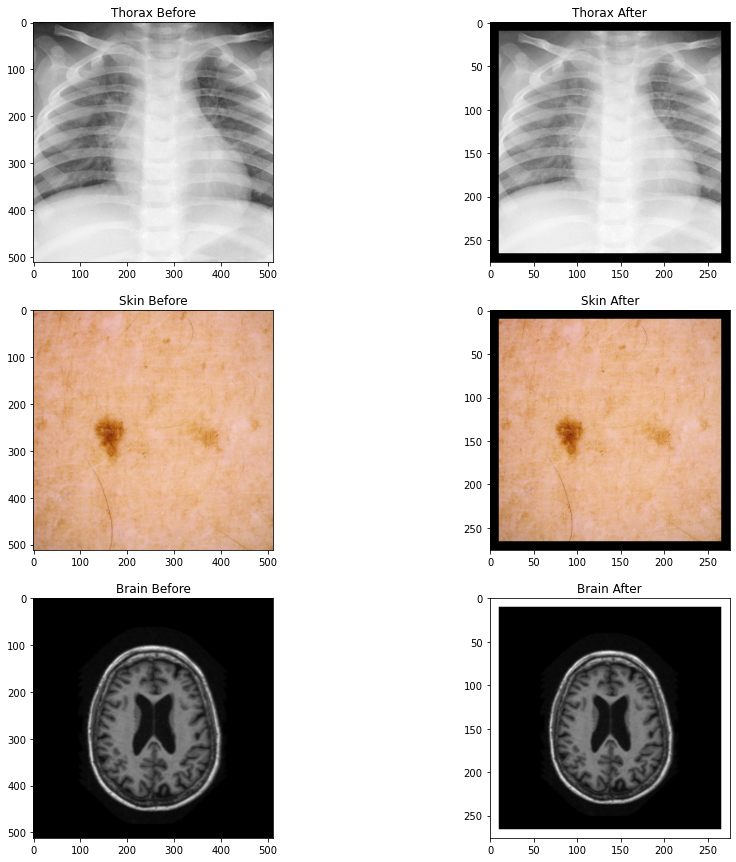

In [11]:
# display
plot_images_before_after(Thorax_img, Skin_img, Brain_img, Thorax_img_preprocessed, Skin_img_preprocessed, Brain_img_preprocessed)

### 5. Augmentierung
Augmentierung stellt eine Erweiterung des Datensatzes durch Hinzufügen von zusätzlichen Daten dar, mit dem Ziel den Datensatz **größer** und **vielseitiger** zu gestalten. Daten die dafür genutzt werden können sind modifizierte Kopien vorhandener Daten oder synthetische Daten.

In [12]:
'''
If you want to do the augmentation on the preprocessed images of the previous 
section, set 'use_preprocessed = True'.
'''

use_preprocessed = False

if use_preprocessed:
    Thorax_img_init = Thorax_img_preprocessed
    Skin_img_init = Skin_img_preprocessed
    Brain_img_init = Brain_img_preprocessed
else:
    Thorax_img_init = Thorax_img
    Skin_img_init = Skin_img
    Brain_img_init = Brain_img

*Definition und Anwendung von verschiedenen Augmentierungsmethoden:*

In [13]:
augmentation = []

Thorax_img_augmented = Thorax_img_init
Skin_img_augmented = Skin_img_init
Brain_img_augmented = Brain_img_init

In [14]:
# affine transformation, will be applied directly
angle = 5  # angle of ration, choose from [-180, 180]
t_x = 10  # translation in x direction, choose from [0, 256]
t_y = 10  # translation in y direction, choose from [0, 256]
scale = 0.9  # scaling rate, choose from [0.1, 1.0]
shear = 5  # shearing in degrees, choose from [0, 180]

Thorax_img_augmented = T.functional.affine(img=Thorax_img_augmented, angle=angle, translate=(t_x, t_y), scale=scale, shear=shear)
Skin_img_augmented = T.functional.affine(img=Skin_img_augmented, angle=angle, translate=(t_x, t_y), scale=scale, shear=shear)
Brain_img_augmented = T.functional.affine(img=Brain_img_augmented, angle=angle, translate=(t_x, t_y), scale=scale, shear=shear)

In [15]:
# gaussian blur
kernel_size = 3  # kernel size, choose from [3, 33] in steps of 2
sigma = 0.1  # standard deviation, choose from [0.1, 15.0]

augmentation.append(T.GaussianBlur(kernel_size=kernel_size, sigma=sigma))

In [16]:
# color jitter
brightness = 0.75  # brightness, choose from [0.0, 1.0]
contrast = 0.75  # contrast, choose from [0.0, 1.0]
saturation = 0.75  # saturation, choose from [0.0, 1.0]
hue = 0.0  # hue, choose from [-0.5, 0.5]

augmentation.append(T.ColorJitter(brightness=[brightness, brightness], contrast=contrast, saturation=saturation, hue=hue))

In [17]:
# random cropping
size = 256  # cropping size, choose from [4, 512]

augmentation.append(T.RandomCrop(size=(size, size), padding=None, padding_mode=None))

In [18]:
# mirroring, will be applied directly
mirror_axis = 'vertical'  # 'vertical' or 'horizontal'

if mirror_axis == 'vertical':
    Thorax_img_augmented = T.functional.vflip(Thorax_img_augmented)
    Skin_img_augmented = T.functional.vflip(Skin_img_augmented)
    Brain_img_augmented = T.functional.vflip(Brain_img_augmented)
elif mirror_axis == 'horizontal':
    Thorax_img_augmented = T.functional.hflip(Thorax_img_augmented)
    Skin_img_augmented = T.functional.hflip(Skin_img_augmented)
    Brain_img_augmented = T.functional.hflip(Brain_img_augmented)

In [19]:
# noise, will be applied directly
noise_mode = ['gaussian', 'speckle', 'poisson', 's&p']

Thorax_img_augmented = random_noise(np.array(Thorax_img_augmented), mode=noise_mode[0], clip=True)
Skin_img_augmented = random_noise(np.array(Skin_img_augmented), mode=noise_mode[0], clip=True)
Brain_img_augmented = random_noise(np.array(Brain_img_augmented), mode=noise_mode[0], clip=True)

Thorax_img_augmented = Image.fromarray(((Thorax_img_augmented / Thorax_img_augmented.max())*255).astype(np.uint8))
Skin_img_augmented = Image.fromarray(((Skin_img_augmented / Skin_img_augmented.max())*255).astype(np.uint8))
Brain_img_augmented = Image.fromarray(((Brain_img_augmented / Brain_img_augmented.max())*255).astype(np.uint8))

In [20]:
# apply augmentation methods
augmentation = torch.nn.Sequential(*augmentation)

Thorax_img_augmented = augmentation(Thorax_img_augmented)
Skin_img_augmented = augmentation(Skin_img_augmented)
Brain_img_augmented = augmentation(Brain_img_augmented)

*Darstellung der augmentierten Bilddaten:*

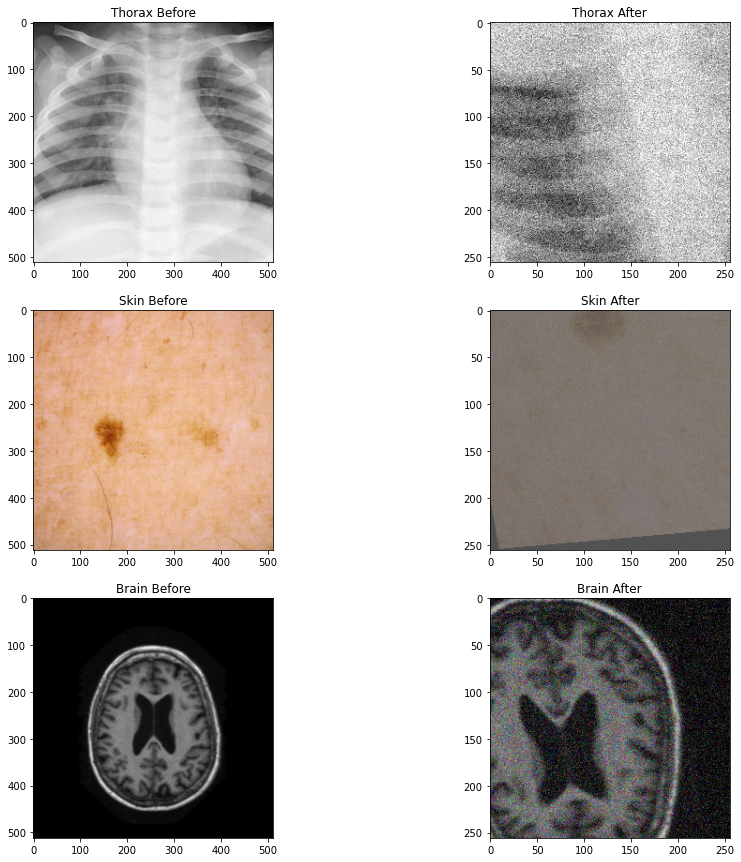

In [21]:
# display
plot_images_before_after(Thorax_img_init, Skin_img_init, Brain_img_init, Thorax_img_augmented, Skin_img_augmented, Brain_img_augmented)